In [1]:
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
blood = pd.read_csv("transfusion.csv",dtype=float)

In [3]:
blood.head()

,recency,freq,mon,t,op
0,2.0,50.0,12500.0,98.0,1.0
1,0.0,13.0,3250.0,28.0,1.0
2,1.0,16.0,4000.0,35.0,1.0
3,2.0,20.0,5000.0,45.0,1.0
4,1.0,24.0,6000.0,77.0,0.0


In [4]:
set_to_use = blood
set_to_use.fillna(0, inplace=True)   ##FILL NaN VALUES TO 0

In [5]:

blood.head()

,recency,freq,mon,t,op
0,2.0,50.0,12500.0,98.0,1.0
1,0.0,13.0,3250.0,28.0,1.0
2,1.0,16.0,4000.0,35.0,1.0
3,2.0,20.0,5000.0,45.0,1.0
4,1.0,24.0,6000.0,77.0,0.0


In [6]:
features = set_to_use.iloc[:].values

In [7]:
features

array([[  2.00000000e+00,   5.00000000e+01,   1.25000000e+04,
          9.80000000e+01,   1.00000000e+00],
       [  0.00000000e+00,   1.30000000e+01,   3.25000000e+03,
          2.80000000e+01,   1.00000000e+00],
       [  1.00000000e+00,   1.60000000e+01,   4.00000000e+03,
          3.50000000e+01,   1.00000000e+00],
       ..., 
       [  2.30000000e+01,   3.00000000e+00,   7.50000000e+02,
          6.20000000e+01,   0.00000000e+00],
       [  3.90000000e+01,   1.00000000e+00,   2.50000000e+02,
          3.90000000e+01,   0.00000000e+00],
       [  7.20000000e+01,   1.00000000e+00,   2.50000000e+02,
          7.20000000e+01,   0.00000000e+00]])

In [8]:
class LogisticRegression(object):
## ETA is learning rate
    def __init__(self, eta=0.03, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []       
        for i in range(self.n_iter):
            y_val = self.activation(X)
            errors = (y - y_val)
            neg_grad = X.T.dot(errors)
            self.w_[1:] += self.eta * neg_grad
            self.w_[0] += self.eta * errors.sum()
            self.cost_.append(self._logit_cost(y, self.activation(X)))
        return self

    def _logit_cost(self, y, y_val):
        logit = -y.dot(np.log(y_val)) - ((1 - y).dot(np.log(1 - y_val)))
        return logit
    
    def _sigmoid(self, z):
        return (1.0 / (1.0 + np.exp(-z)))
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """ Activate the logistic neuron"""
        z = self.net_input(X)
        return self._sigmoid(z)
    
    def predict_proba(self, X):
        return activation(X)

    def predict(self, X):
        # equivalent to np.where(self.activation(X) >= 0.5, 1, 0)
        return np.where(self.net_input(X) >= 0.0, 1, 0)

In [9]:
y = blood.iloc[0:, 4].values
print(y.shape)
X = blood.iloc[:,:-1].values
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
X_std[:,2] = (X[:,2] - X[:,2].mean()) / X[:,2].std()
X_std[:,3] = (X[:,3] - X[:,3].mean()) / X[:,3].std()
print(X_std.shape)

(748,)
(748, 4)


In [10]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x3_min, x3_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx1, xx2, xx3 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution),np.arange(x3_min, x3_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel(),xx3.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.zlim(xx3.min(), xx3.max())
    

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

C:\Users\Kaiwalya\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


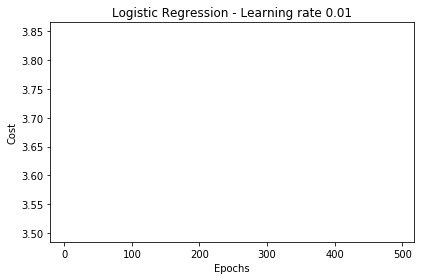

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

lr = LogisticRegression(n_iter=500, eta=0.2).fit(X_std, y)
plt.plot(range(1, len(lr.cost_) + 1), np.log10(lr.cost_))
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Logistic Regression - Learning rate 0.01')

plt.tight_layout()
plt.show()